In [1]:
#Imports

from import_images import getImages
from import_model import get_cellpose_model
from make_predictions import makePredictions
import numpy as np

import torch

from cellpose import resnet_torch
from cellpose import transforms
from cellpose import utils
import cv2

import time

from unet_architecture import UNet
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torchvision
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

c:\Users\rz200\AppData\Local\anaconda3\envs\cellprob\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
images_directory = "C:\\Users\\rz200\\Documents\\development\\distillCellSegTrack\\pipeline\\uploads\\"
file_names, images = getImages(images_directory)

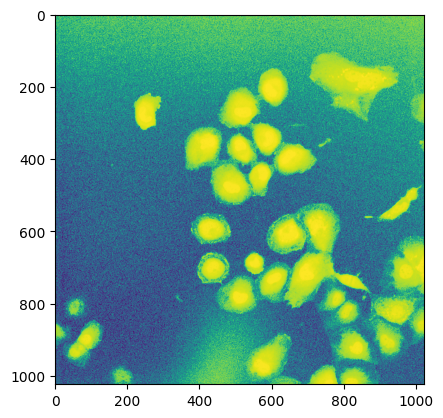

In [11]:
import cv2 as cv

image = images[0]

equalized = cv2.equalizeHist(image)

plt.imshow(equalized)

In [12]:
print(image)

[[5 4 3 ... 7 7 7]
 [3 3 7 ... 7 5 7]
 [4 3 4 ... 7 6 8]
 ...
 [3 2 3 ... 2 2 2]
 [3 2 1 ... 2 2 2]
 [1 2 1 ... 2 3 3]]


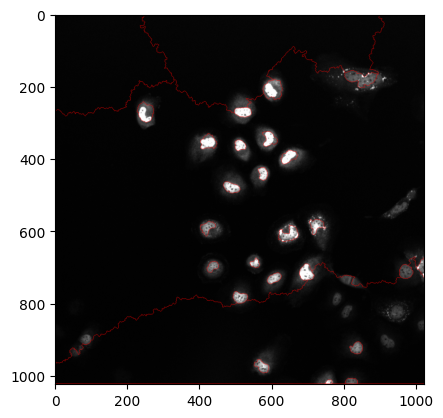

In [8]:
import cv2 as cv

image = images[0]

#gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(image,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)


# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

#plt.imshow(thresh)

ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers)

image = cv.cvtColor(image,cv.COLOR_GRAY2RGB)
markers = cv.watershed(image,markers)
image[markers == -1] = [255,0,0]

plt.imshow(image)

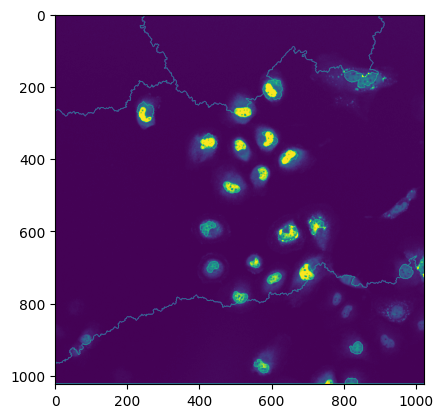

In [10]:
plt.imshow(image[:,:,0])